In [2]:
import pandas as pd
import os

# **Loading Data**

In [3]:
dir = "/home/erika/UCSD/UCSD/capstone/NLP_with_Disaster_Tweets/data/tweeter_disaster_text_analysis"
file = "train.csv"
file_path = os.path.join(dir,file)

df = pd.read_csv(file_path, encoding='utf-8')


# **Exploring data**

In [4]:
df.head()

,id,keyword,location,text,target,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,ablaze,Birmingham,Our Deeds are the Reason of this #earthquake M...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,ablaze,Est. September 2012 - Bristol,Forest fire near La Ronge Sask. Canada,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,ablaze,AFRICA,All residents asked to 'shelter in place' are ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,ablaze,"Philadelphia, PA","13,000 people receive #wildfires evacuation or...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,ablaze,"London, UK",Just got sent this photo from Ruby #Alaska as ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7613 non-null   int64  
 1   keyword      7583 non-null   object 
 2   location     5108 non-null   object 
 3   text         7612 non-null   object 
 4   target       7610 non-null   object 
 5   Unnamed: 5   414 non-null    object 
 6   Unnamed: 6   79 non-null     object 
 7   Unnamed: 7   23 non-null     object 
 8   Unnamed: 8   13 non-null     object 
 9   Unnamed: 9   5 non-null      object 
 10  Unnamed: 10  5 non-null      object 
 11  Unnamed: 11  3 non-null      object 
 12  Unnamed: 12  2 non-null      object 
 13  Unnamed: 13  1 non-null      float64
dtypes: float64(1), int64(1), object(12)
memory usage: 832.8+ KB


In [6]:
df.shape

(7613, 14)

### Checking commas within the text in the csv file

In [7]:
## 408 rows out of 7613 that have been moved out of the target column

df.loc[(df["Unnamed: 13"].notnull())|(df["Unnamed: 12"].notnull())|(df["Unnamed: 11"].notnull())|(df["Unnamed: 10"].notnull())|(df["Unnamed: 9"].notnull())|(df["Unnamed: 8"].notnull())|(df["Unnamed: 7"].notnull())|(df["Unnamed: 6"].notnull())|(df["Unnamed: 5"].notnull())|(df["Unnamed: 5"].notnull())]

,id,keyword,location,text,target,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
21,32,ablaze,Est. September 2012 - Bristol,London is cool,),0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,71,ablaze,England.,First night with retainers in. It's quite weir...,I have to wear them every single night for th...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,89,ablaze,Twitter Lockout in progress,Rene Ablaze &amp,Jacinta - Secret 2k13 (Fallen Skies Edit) - M...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,92,ablaze,"Calgary, AB",#NowPlaying: Rene Ablaze &amp,Ian Buff - Magnitude http://t.co/Av2JSjfFtc ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,96,accident,CLVLND,'I can't have kids cuz I got in a bicycle acci...,split my testicles. it's impossible for me to...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7462,10678,wounds,"Tampa, FL",@NicolaClements4 IÛªm not sure that covering ...,),0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7463,10679,wounds,Not Steven Yeun / AMC.,@DauntedPsyche - Man gently dabbed the cotton ...,the pain a lot more worse than Glenn had ever -,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7479,10698,wreck,United States,@_PokemonCards_ @IceQueenFroslas why did they ...,-,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7510,10743,wreckage,WorldWide,#Australia #News,RT janeenorman: 'High probability' aircraft w...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Cleaning data**

In [8]:
df.head()

,id,keyword,location,text,target,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,ablaze,Birmingham,Our Deeds are the Reason of this #earthquake M...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,ablaze,Est. September 2012 - Bristol,Forest fire near La Ronge Sask. Canada,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,ablaze,AFRICA,All residents asked to 'shelter in place' are ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,ablaze,"Philadelphia, PA","13,000 people receive #wildfires evacuation or...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,ablaze,"London, UK",Just got sent this photo from Ruby #Alaska as ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Moving data into their corresponding column.  Fixing csv format**
#### **1. Removing carrier return in all columns.**  

In [12]:
data = df.copy(deep=True)
data.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r", "\r"], value=["","",""], regex=True, inplace=True)
data.shape

(7613, 14)

#### **2. Copy df into a file to clean data line by line.**


In [13]:
dir = "/home/erika/UCSD/UCSD/capstone/NLP_with_Disaster_Tweets/data/tweeter_disaster_text_analysis"
file = "train_temp.csv"
file_path = os.path.join(dir,file)
data.to_csv(file_path, index = False)

#### **3. Checking unique target values**

        

In [14]:
lst = []
dic = {}
target_pattern = ",{1}.+$"

with open (file_path, "r") as f:
    next(f)
    for line in f:
        line = line.strip("\n")
        line = line.strip(",")
        line = line.strip()        
        target = line.rsplit(',',1)[1]
        lst.append(target)

target_unique = set(lst)
print(target_unique)

{'1', '0.0', '0'}


#### **4. Formatting data to get all values into their corresponding columns** ####

In [15]:
import re
lst = []
dic = {}
count = 0


id_pattern = "^.+?,"                                #anything before the first comma
keyword_pattern = ",.*?,"                           #anything between the first and second comma.  It can be null
location_pattern_1 = ",\".+?\",{1}"                 #first quoted value between commas
location_pattern_2 = ",.*?,(.*?),"                  #grouping: second value between commas.  It can be null

with open (file_path, "r") as f:
    next(f)
    for line in f:
        # removing commas at the end of the row.
        line = line.strip("\n")
        line = line.strip(",")
        line = line.strip()        

        #Getting Id
        id_search = re.search(id_pattern, line)        
        id = id_search.group()[:-1]                
        
        #Getting keyword
        keyword_search = re.search(keyword_pattern,line)
        keyword = keyword_search.group()[1:-1]                
        
        if re.search(location_pattern_1, line) != None:    
            #Getting location
            location_search = re.search(location_pattern_1, line)
            location = location_search.group()[1:-1]                        
            
        else:    
            #Getting location
            location_search = re.search(location_pattern_2, line)
            location = location_search.group(1)        
                    
        #Getting target                             #anything after the last comma
        target = line.rsplit(',',1)[1]
        
        #Getting text
        before_text = id + "," + keyword + "," + location + ","
        after_text = ","+target
        text = line.replace(before_text,"")         #removed id, keyword, loaction from the orininal string
        text = text.replace(after_text,"")          #removed target. Text is what is left - with commas, quotes, anything so we keep the text as complete as possible.
              
        #target = int(target)        

        #Getting data into a dataframe
        dic = {}
        dic["id"] = id
        dic["keyword"]=keyword
        dic["location"]= location
        dic["text"]=text
        dic["target"] = target
        lst.append(dic)
    
tweets_df = pd.DataFrame(lst)
tweets_df


,id,keyword,location,text,target
0,1,ablaze,Birmingham,Our Deeds are the Reason of this #earthquake M...,1
1,4,ablaze,Est. September 2012 - Bristol,Forest fire near La Ronge Sask. Canada,1
2,5,ablaze,AFRICA,All residents asked to 'shelter in place' are ...,1
3,6,ablaze,"""Philadelphia, PA""","""13,000 people receive #wildfires evacuation o...",1
4,7,ablaze,"""London, UK""",Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,,,Two giant cranes holding a bridge collapse int...,1
7609,10870,,,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,,,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,,,Police investigating after an e-bike collided ...,1


In [ ]:
#replace %20 by comma,  quote all cells except target and to_csv

#### **Updating target to integer to remove 0.0** ####

In [16]:
tweets_df["target"].unique()

array(['1', '0', '0.0'], dtype=object)

In [17]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   object
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   object
dtypes: object(5)
memory usage: 297.5+ KB


In [18]:
tweets_df["target"] = tweets_df["target"].astype(float)
tweets_df["target"] = tweets_df["target"].astype(int)
tweets_df.head()

,id,keyword,location,text,target
0,1,ablaze,Birmingham,Our Deeds are the Reason of this #earthquake M...,1
1,4,ablaze,Est. September 2012 - Bristol,Forest fire near La Ronge Sask. Canada,1
2,5,ablaze,AFRICA,All residents asked to 'shelter in place' are ...,1
3,6,ablaze,"""Philadelphia, PA""","""13,000 people receive #wildfires evacuation o...",1
4,7,ablaze,"""London, UK""",Just got sent this photo from Ruby #Alaska as ...,1


# **EDA**


#### **1. Target unique values** ####


In [19]:
tweets_df["target"].unique()

array([1, 0])

#### **2. Checking missing values** ####

In [20]:
# checking null values
tweets_df.isna().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [21]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   object
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 297.5+ KB


In [26]:
# checking blank cells
#If we have a big df, how do we check blank cells across all columns without specifying the column name one by one
#replace blank to nan and then count? and without changing to nan?

#
df_object = tweets_df.select_dtypes(["object"])
df_blank = df_object.apply(lambda x: x.str.len()) # x is the column vector (series)
#how to use value_counts and apply to count all zeros in all columns

#df_blank["keyword"].value_counts()[0]

#for column_name in df_blank.columns:
#    print(str(df_blank[column_name].value_counts()[0]))
#     #print("{} = {}".format(column_name,str(df_blank[column_name].value_counts()[0])))


#df_blank["id"].value_counts()[0]

print("keyword blanks = {}".format(df_blank["keyword"].value_counts()[0]))
print("location blanks = {}".format(df_blank["location"].value_counts()[0]))


keyword blanks = 30
location blanks = 2505


#### **3. Checking unique keyword values** ####

In [25]:
tweets_df["keyword"].unique()

array(['ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed

#### **4. Top 10 keywords** ####

In [28]:
# keyword frequency in Keyword column
import matplotlib.pyplot as plt

keyword_freq = pd.DataFrame(tweets_df["keyword"].value_counts())
keyword_freq.reset_index(inplace = True)
keyword_freq.rename(columns = {"index":"keyword", "keyword":"count"}, inplace = True)
keyword_freq.sort_values(by=["count"])
keyword_freq.head(10)


,keyword,count
0,ablaze,67
1,fatalities,45
2,armageddon,42
3,deluge,42
4,sinking,41
5,body%20bags,41
6,harm,41
7,damage,41
8,twister,40
9,outbreak,40


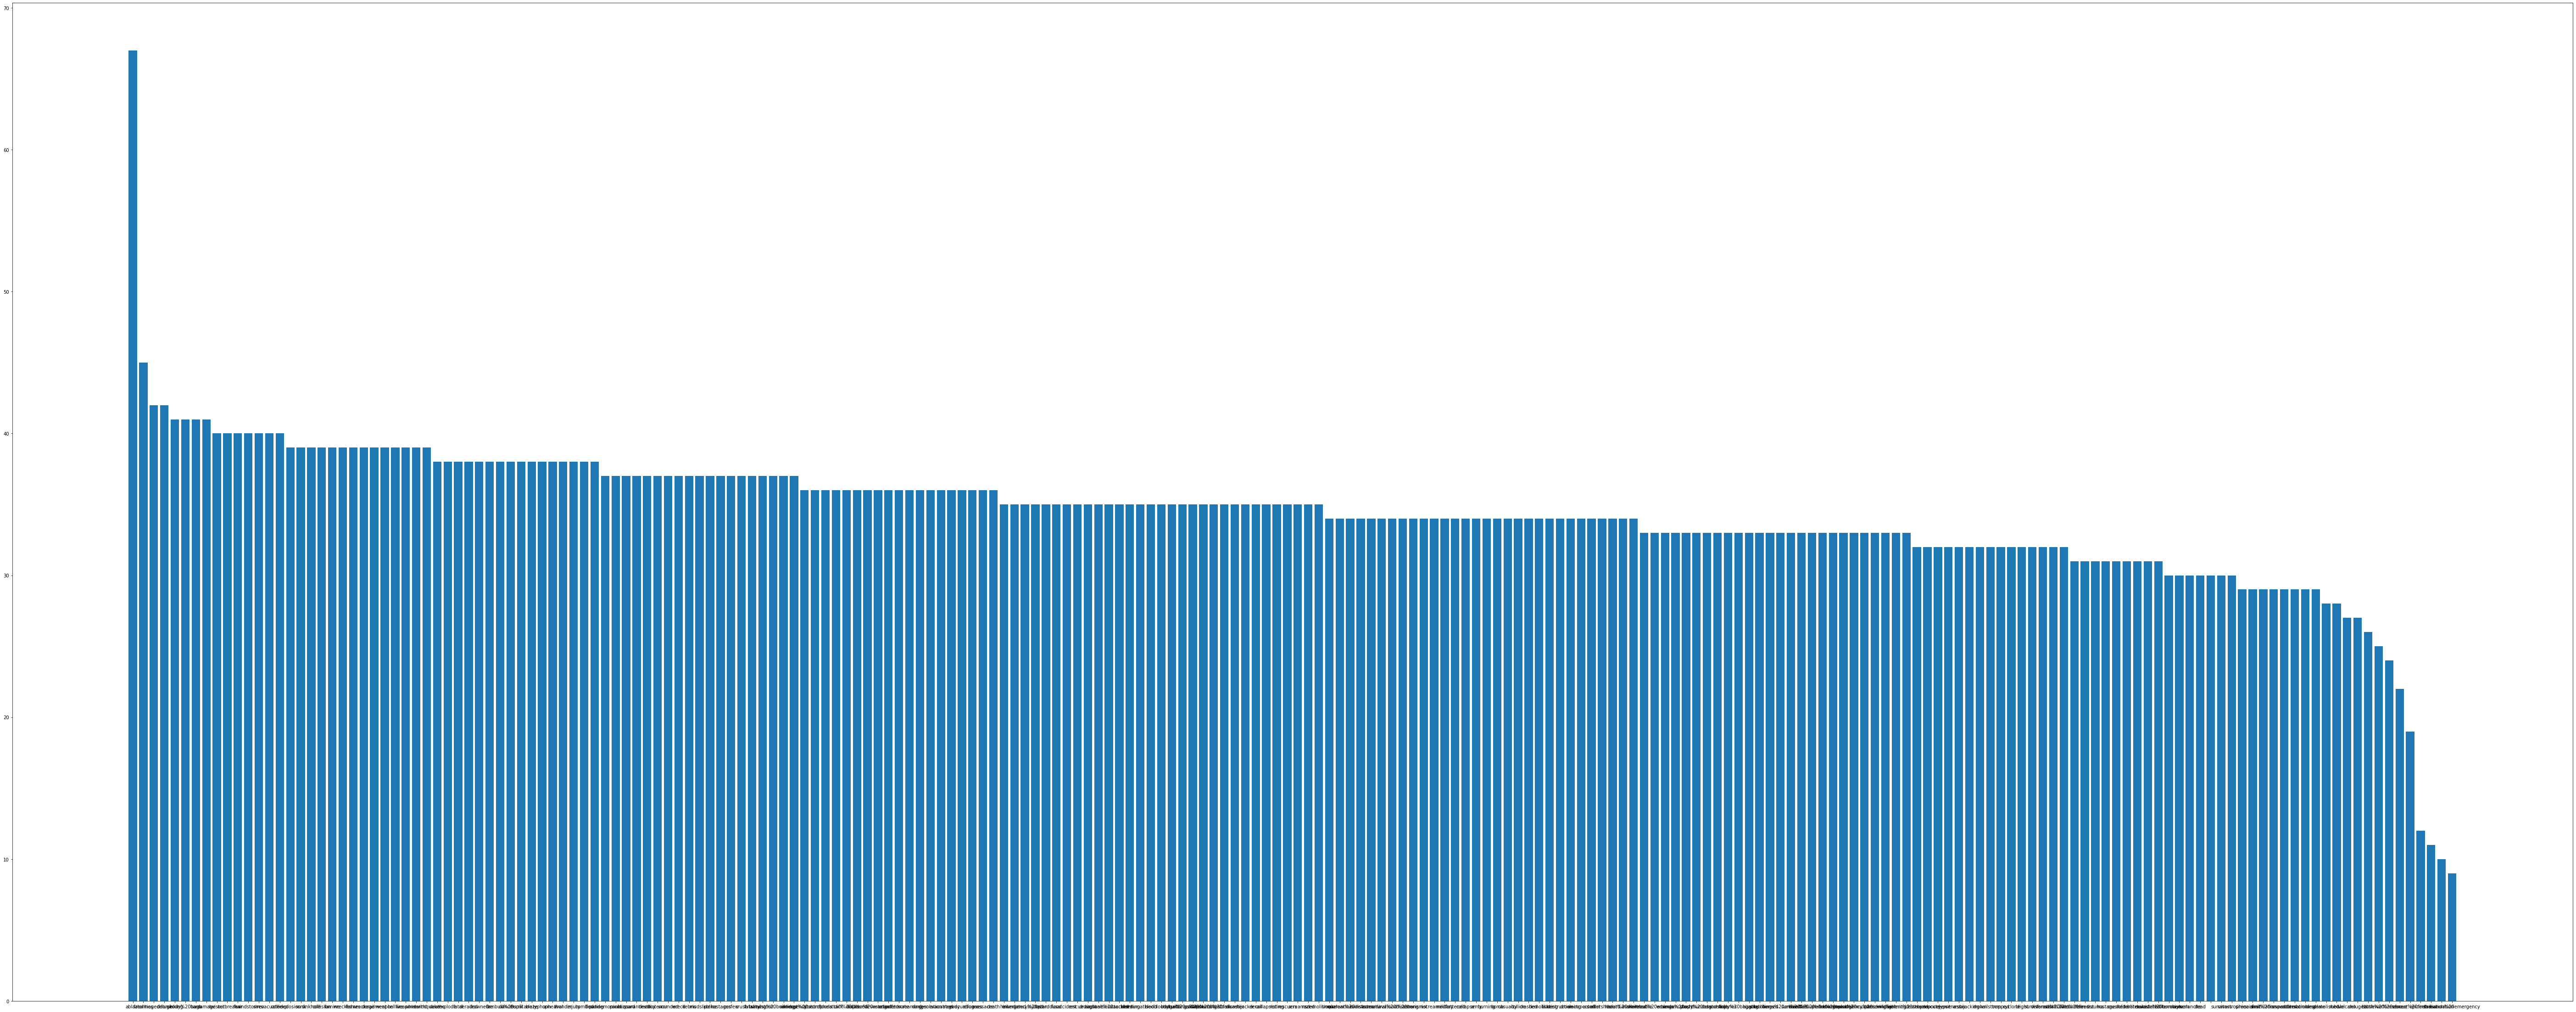

In [29]:
fig = plt.figure(figsize = (100, 40))
plt.bar(keyword_freq["keyword"],keyword_freq["count"])
plt.show()

#### **5. Bottom 10 keywords** ####

In [30]:
keyword_freq.sort_values(by=["count"], ascending = True, inplace = True)
keyword_freq.head(10)

,keyword,count
221,radiation%20emergency,9
220,inundation,10
219,threat,11
218,epicentre,12
217,forest%20fire,19
216,rescue,22
215,war%20zone,24
214,bush%20fires,25
213,battle,26
212,deluged,27


#### **6. Unique Location values**####

In [54]:
tweets_df["location"].unique()

array(['Birmingham', 'Est. September 2012 - Bristol', 'AFRICA', ...,
       '"Vancouver, Canada"', 'London ', 'Lincoln'], dtype=object)

#### **7. Top 10 location** #####

In [57]:
# Location frequency
location_freq = pd.DataFrame(tweets_df["location"].value_counts())
location_freq.reset_index(inplace = True)
location_freq.sort_values(by=["location"], ascending = False, inplace = True)
location_freq.head(10)

,index,location
0,,2505
1,USA,104
2,New York,71
3,United States,50
4,London,45
5,Canada,29
6,Nigeria,28
7,UK,27
8,"""Los Angeles, CA""",26
9,India,24


#### **8. Bottom 10 location** #####

In [58]:
location_freq.sort_values(by=["location"], ascending = True, inplace = True)
location_freq.head(10)

,index,location
2726,South Korea GMT+9,1
1097,Waddesdon,1
1064,England,1
1056,NYC&NJ,1
1057,swindon,1
1058,Croydon,1
1059,EGYPT,1
1060,"""i got 1/13 menpa replies, omg""",1
1061,where the wild things are,1
1062,Aix-en-Provence/Utrecht,1


In [34]:
# terms frequency in text colum

In [ ]:
# eliminate stop words in text column (the, a, etc)

In [5]:
# 100 most common words in the text column

In [6]:
# 100 most common words in text column when target is 1

In [7]:
# 100 most common words in text column when target is 0

In [20]:
# common words in text column when target is 1 and 0.  We can find out what terms might be missinterpreted as an emergency
# lenght of text, mean